In [1]:
import pandas as pd

#from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cmlib
#from datetime import datetime as dt
#from scipy.signal import lfilter


import processData as prd
import graphFlows as gf

In [2]:
plt.rcParams['font.family'] = 'Gill Sans MT'
plt.rcParams["font.size"] = 18

In [3]:
#For PPTs
plt.rcParams["text.color"] = 'white'

In [4]:
startDate = pd.to_datetime("2022-06-19 00:00:00")
endDate = pd.to_datetime("2022-06-22 00:00:00")

## Process meassurements -----------------------------

In [5]:
#flow meter file
flowDataCsv = '../01-Data/03-FlowmeterData/01-FlowrateMeassurements.csv'

#m3/h
dfFlowsMeassured = prd.processMeassuredData(flowDataCsv)

#cuts the flow
dfFlowsMeassuredDWF = dfFlowsMeassured[(dfFlowsMeassured.index >= startDate)&(dfFlowsMeassured.index < endDate)]


# Model data ----------------------------------------------------------

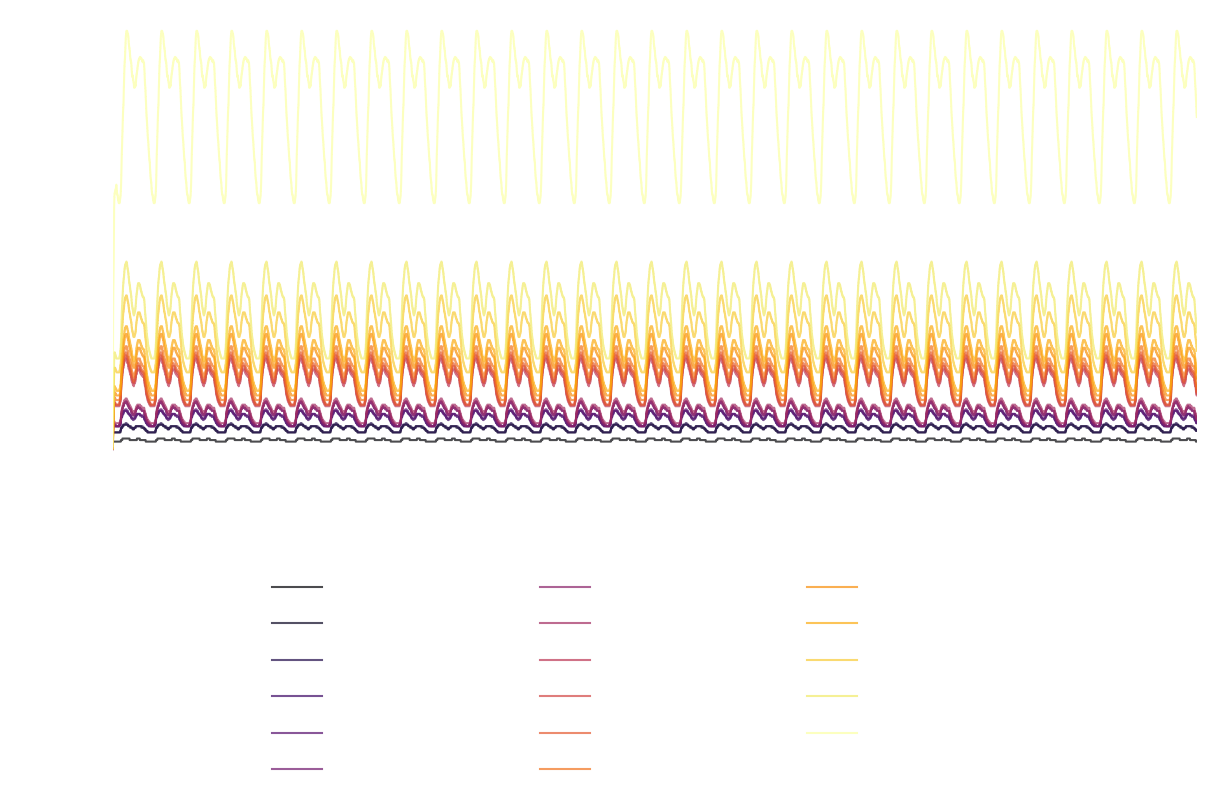

In [6]:
#VALUES 2022 DWF

# values are in m3/s
flowModelDataCsv = '../01-Data/04-PCSWMMResults/02-ModelFlowsDWF2022Complete.csv'

#renameCols = {PSC.WTP: GC.WTP, PSC.STSACRA_TO_LIMOLIOU: GC.STSACRA_TO_LIMOLIOU, PSC.PASCAL:GC.PASCAL}
flowModel2022Valsm3h = prd.getModelData(flowModelDataCsv)

colorSeries = [ cmlib._colormaps['inferno'](x) for x in np.linspace(0, 1,flowModel2022Valsm3h.shape[1])]

ax = gf.plotTimeSeries(flowModel2022Valsm3h,'../02-Output/01-Graphs/'+'FlowsDWFSWMM'+'.png',ppt=True,colorS=colorSeries)

In [7]:
flowModel2022Valsm3h

,DOM_602606,UNI_8693,UNI_13121,UNI_12850,C21,UNI_1208035,UNI_1648876,UNI_18252,UNI_18251,DOM_608354,DOM_19706,DOM_15368,DOM_20726,DOM_23811,DOM_35983,DOM_1631422,DOM_1631424
LongDate,,,,,,,,,,,,,,,,,
2022-06-19 00:01:00,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-19 00:02:00,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-19 00:03:00,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-19 00:04:00,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-06-19 00:05:00,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-19 23:51:00,180.0,432.0,432.0,612.0,612.0,684.0,684.0,756.0,1260.0,1296.0,1332.0,1476.0,1692.0,1836.0,2304.0,2772.0,7812.0
2022-07-19 23:52:00,180.0,432.0,432.0,612.0,612.0,684.0,684.0,720.0,1260.0,1296.0,1332.0,1440.0,1656.0,1800.0,2304.0,2772.0,7812.0
2022-07-19 23:53:00,180.0,432.0,432.0,612.0,612.0,684.0,684.0,720.0,1260.0,1296.0,1332.0,1440.0,1656.0,1800.0,2304.0,2736.0,7776.0


# WEST DATA ------------------

In [8]:
#WEST_WTP_csv = '01-Data/07-WESTFlowEST.csv'
WEST_WTP_csv = '../01-Data/02-WESTResults/01-46SectionsCompleteResults.csv'

#dictRename = {WTPName:WTP_WEST+UNITS_FLOW,NO_CATCH_WEST:NO_WEST+UNITS_FLOW}

dfWEST_Results = prd.getDFWESTResults(WEST_WTP_csv,startDate,endDate)

assert prd.checkCorrectFlowWEST(dfWEST_Results), "The flows are not incrementing downstream"


# Comparisons -----

In [9]:
WESTToSWMMCOLS= [['4 (Out)','DOM_602606'],
                 ['6 (In)','UNI_8693'],
                 ['16 (Out)','UNI_13121'],
                 ['19 (Out)','UNI_12850'],
                 ['26 (Out)','C21'],
                 ['28 (Out)','UNI_1208035'],
                 ['30 (In)','UNI_1648876'],
                 ['32 (In)','UNI_18252'],
                 ['33 (In)','UNI_18251'],
                 ['34 (In)','DOM_608354'],
                 ['35 (In)','DOM_19706'],
                 ['36 (In)','DOM_15368'],
                 ['41 (In)','DOM_20726'],
                 ['42 (In)','DOM_23811'],
                 ['45 (In)','DOM_35983'],
                 ['46 (In)','DOM_1631422'],
                 ['46 (Out)','DOM_1631424']]



In [14]:

colorSeries = [ cmlib._colormaps['jet'](x) for x in np.linspace(0, 1,len(WESTToSWMMCOLS))]

for p, c in zip(WESTToSWMMCOLS,colorSeries):

    swmV = flowModel2022Valsm3h[p[1]]
    westV = dfWEST_Results[p[0]] 

    file = '../02-Output/01-Graphs/' + westV +'.png'
    
    gf.plotComparisonsSWMM_WEST(swmV,westV,file,c)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U23'), dtype('float64')) -> None

In [ ]:
assert True

In [ ]:
STATION_EST_WEST_MANUAL = '.Well_9.Q_Out'

WEST_WTP_Manual_csv = '01-Data/04-ResultsManualOldWESTModel/05-ResultsBPWithInfiltration.csv'

dfWEST_Manual_Results = getDFWESTResults(WEST_WTP_Manual_csv,startDate,endDate,STATION_EST_WEST_MANUAL)

NameError: name 'getDFWESTResults' is not defined

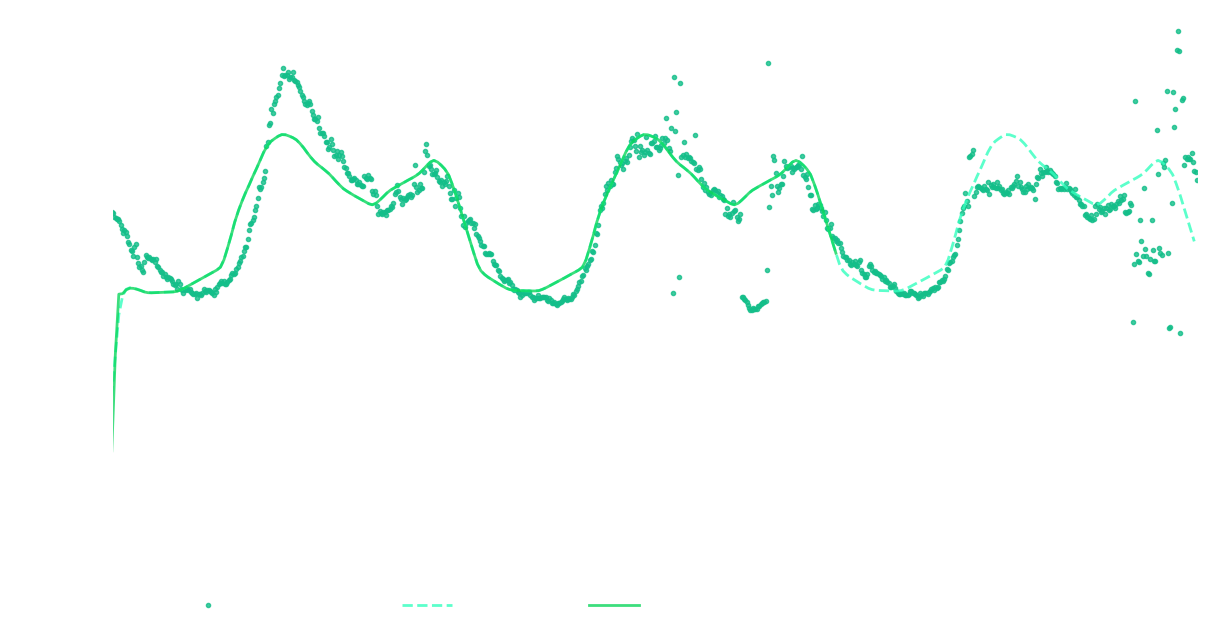

In [ ]:
measured = dfFlowsm3hDWF[[ESTA_ME]].copy()
measured.rename(columns={measured.columns[0]:"Measured"},inplace=True)

westOriginal = dfWEST_Results[[WTP_WEST+" (m3/h)"]].copy()
westOriginal.rename(columns={westOriginal.columns[0]:"Legacy"},inplace=True)

westManual = dfWEST_Manual_Results[[WTP_WEST+" (m3/h)"]].copy()
westManual.rename(columns={westManual.columns[0]:"Basic Parameters & 0.25 Infiltration"},inplace=True)

plotComparisonsWEST(measured,westOriginal,westManual,"BasicParametersInfiltra",[EST_C,EST_C2,EST_C3])

In [ ]:
STATION_EST_WEST_MANUAL = '.Qin_GC.Q_In'

WEST_WTP_OLDModified_csv = '01-Data/03-ResultsOldWESTModel(DWF)/05-WESTFlowResults(modifiedkto2).csv'

dfWEST_Manual_Results = getDFWESTResults(WEST_WTP_OLDModified_csv,startDate,endDate,STATION_EST_WEST_MANUAL)

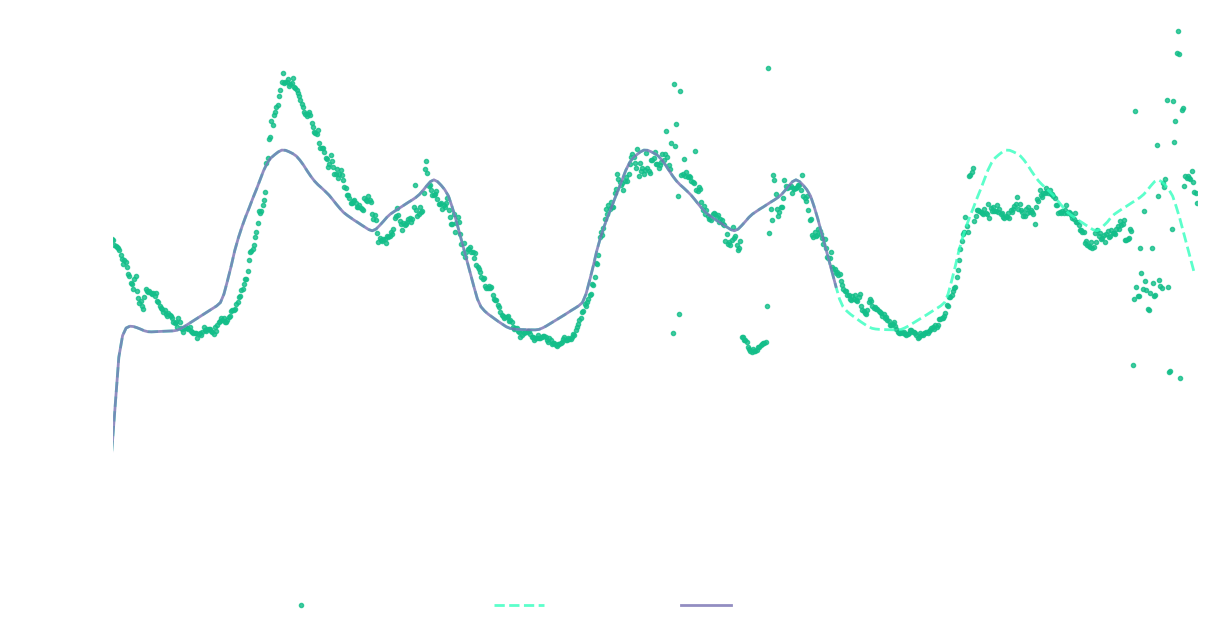

In [ ]:
measured = dfFlowsm3hDWF[[ESTA_ME]].copy()
measured.rename(columns={measured.columns[0]:"Measured"},inplace=True)

westOriginal = dfWEST_Results[[WTP_WEST+" (m3/h)"]].copy()
westOriginal.rename(columns={westOriginal.columns[0]:"Legacy"},inplace=True)

westManual = dfWEST_Manual_Results[[WTP_WEST+" (m3/h)"]].copy()
westManual.rename(columns={westManual.columns[0]:"Basic Parameters"},inplace=True)

plotComparisonsWEST(measured,westOriginal,westManual,"BasicParameters",[EST_C,EST_C2,BEAU_C])